In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("D:/xuexi/practice/REDSPb-main/redspb/data1.csv")
df['numbers'] = df['numbers'].str.replace('[', '', regex=False)
df['numbers'] = df['numbers'].str.replace(']', '', regex=False)
X = np.array([row.split(',') for row in df['numbers'] ], dtype=float)
y = np.array([row.split(',') for row in df['target'] ], dtype=float)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)
X_train_flt = X_train.flatten()
y_train_flt = y_train.flatten()
X_test_flt = X_test.flatten()
y_test_flt = y_test.flatten()

RandomForestClassifier

In [21]:
RFclassifier = RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1)
RFclassifier.fit(X_train_flt.reshape(-1, 1), y_train_flt)  
y_pred_RFcl = RFclassifier.predict(X_test_flt.reshape(-1, 1))

Оценка результатов RFclassifier

In [22]:
print("Accuracy:", accuracy_score(y_test_flt, y_pred_RFcl))
print("Confusion Matrix:\n", confusion_matrix(y_test_flt, y_pred_RFcl))
print("Classification Report:\n", classification_report(y_test_flt, y_pred_RFcl))

Accuracy: 0.987225404609584
Confusion Matrix:
 [[6856208   35624]
 [  58528  419893]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99   6891832
         1.0       0.92      0.88      0.90    478421

    accuracy                           0.99   7370253
   macro avg       0.96      0.94      0.95   7370253
weighted avg       0.99      0.99      0.99   7370253



RandomForestRegressor

In [23]:
RFregressor = RandomForestRegressor(n_estimators=10, random_state=42, n_jobs=-1)
RFregressor.fit(X_train_flt.reshape(-1, 1), y_train_flt)
y_pred_RFrg = RFregressor.predict(X_test_flt.reshape(-1, 1))

Оценка результатов RFregressor

In [25]:
print(f"Mean Squared Error: ", mean_squared_error(y_test_flt, y_pred_RFrg))
print(f"R^2 Score: ", r2_score(y_test_flt, y_pred_RFrg))

Mean Squared Error:  0.009814656058989834
R^2 Score:  0.8383056068835316


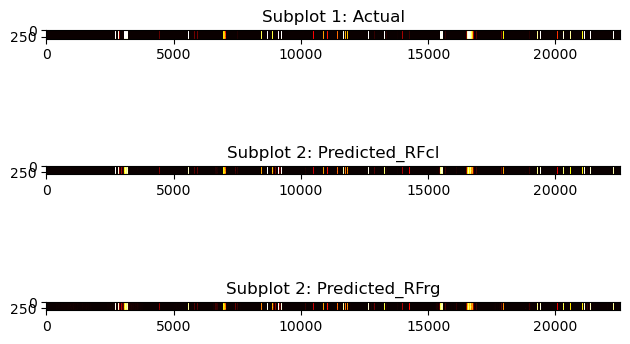

In [27]:
y_pred_RFcl = y_pred_RFcl.reshape(len(y_pred_RFcl) // 22539, 22539)
y_pred_RFrg = y_pred_RFrg.reshape(len(y_pred_RFrg) // 22539, 22539)

plt.subplot(3, 1, 1)
plt.imshow(y_test, cmap='hot')
plt.title('Subplot 1: Actual')

plt.subplot(3, 1, 2)
plt.imshow(y_pred_RFcl, cmap='hot')
plt.title('Subplot 2: Predicted_RFcl')

plt.subplot(3, 1, 3)
plt.imshow(y_pred_RFrg, cmap='hot')
plt.title('Subplot 2: Predicted_RFrg')

plt.tight_layout()
plt.show()